In [25]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import chart_studio.plotly as py
from plotly import tools
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm

In [12]:
data = pd.read_csv("./data/classification_1.csv")
data.head()

,timestamp,B_18,B_2,B_19,B_16,Good/Bad,390.0,391.0,392.0,393.0,394.0,395.0,396.0,396.93,397.0,imputed
0,2020-03-01 00:00:00,8138.62,-0.0007,8.4195,521.66,0,0,0,1,0,0,0,0,0,0,0
1,2020-03-01 00:05:00,8131.49,0.0019,8.4318,522.28,0,0,0,1,0,0,0,0,0,0,0
2,2020-03-01 00:10:00,8133.23,-0.0043,8.4178,522.42,0,1,0,0,0,0,0,0,0,0,0
3,2020-03-01 00:15:00,8133.83,0.0007,8.3682,522.86,0,0,0,1,0,0,0,0,0,0,0
4,2020-03-01 00:20:00,8133.80,-0.0019,8.4294,522.19,0,0,0,0,1,0,0,0,0,0,0


In [13]:
data = data.set_index("timestamp")
data.head()

,B_18,B_2,B_19,B_16,Good/Bad,390.0,391.0,392.0,393.0,394.0,395.0,396.0,396.93,397.0,imputed
timestamp,,,,,,,,,,,,,,,
2020-03-01 00:00:00,8138.62,-0.0007,8.4195,521.66,0,0,0,1,0,0,0,0,0,0,0
2020-03-01 00:05:00,8131.49,0.0019,8.4318,522.28,0,0,0,1,0,0,0,0,0,0,0
2020-03-01 00:10:00,8133.23,-0.0043,8.4178,522.42,0,1,0,0,0,0,0,0,0,0,0
2020-03-01 00:15:00,8133.83,0.0007,8.3682,522.86,0,0,0,1,0,0,0,0,0,0,0
2020-03-01 00:20:00,8133.80,-0.0019,8.4294,522.19,0,0,0,0,1,0,0,0,0,0,0


In [14]:
Label = data['Good/Bad']
data.drop(columns=['Good/Bad'],inplace=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data,Label,test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [21]:
X_train,X_train.shape

(array([[-0.59573556,  0.50771053, -0.42928514, ..., -0.13948795,
         -0.14177252, -0.07145814],
        [ 0.98851213,  0.34664252,  0.5533988 , ..., -0.13948795,
         -0.14177252, -0.07145814],
        [-0.83499571,  0.50771053,  0.01933144, ..., -0.13948795,
         -0.14177252, -0.07145814],
        ...,
        [-0.01407688,  1.47411862, -0.32514201, ..., -0.13948795,
         -0.14177252, -0.07145814],
        [ 0.378582  ,  0.92188543,  2.29579357, ..., -0.13948795,
         -0.14177252, -0.07145814],
        [-1.05959658, -0.82685302,  0.03535346, ..., -0.13948795,
         -0.14177252, -0.07145814]]),
 (14566, 14))

In [22]:
X_test,X_test.shape

(array([[ 3.53975378e-01,  1.49677070e-03, -5.57461308e-01, ...,
         -1.39487945e-01, -1.41772518e-01, -7.14581383e-02],
        [-4.64325724e-01, -1.36561528e-01, -1.32877756e-01, ...,
         -1.39487945e-01, -1.41772518e-01, -7.14581383e-02],
        [-1.04493732e+00,  1.85574502e-01,  1.76039104e+00, ...,
         -1.39487945e-01,  7.05355324e+00, -7.14581383e-02],
        ...,
        [-2.17735948e-01, -7.80833588e-01, -4.47566417e-02, ...,
         -1.39487945e-01, -1.41772518e-01, -7.14581383e-02],
        [-1.85747942e+00, -2.48355260e+00,  1.58147847e+00, ...,
          7.16907828e+00, -1.41772518e-01, -7.14581383e-02],
        [ 1.68430366e+00,  1.85574502e-01,  1.39455490e+00, ...,
         -1.39487945e-01, -1.41772518e-01, -7.14581383e-02]]),
 (4047, 14))

In [23]:
y_train, y_train.shape

(timestamp
 2020-03-30 00:40:00    0
 2020-03-10 06:35:00    0
 2020-04-05 08:40:00    0
 2020-04-13 20:20:00    0
 2020-04-02 19:55:00    0
                       ..
 2020-05-02 20:20:00    0
 2020-04-23 05:35:00    0
 2020-04-09 19:55:00    0
 2020-04-16 15:00:00    1
 2020-04-22 01:50:00    0
 Name: Good/Bad, Length: 14566, dtype: int64,
 (14566,))

In [24]:
y_test, y_test.shape

(timestamp
 2020-05-10 03:05:00    0
 2020-04-14 22:35:00    0
 2020-04-21 19:50:00    1
 2020-04-01 13:35:00    0
 2020-04-21 15:00:00    0
                       ..
 2020-04-07 19:00:00    0
 2020-04-28 21:15:00    0
 2020-05-08 17:00:00    0
 2020-03-05 12:25:00    1
 2020-05-07 19:20:00    1
 Name: Good/Bad, Length: 4047, dtype: int64,
 (4047,))

In [49]:
def get_classification_analysis(params):
    clf = svm.SVC()
    clf.set_params(**params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print("Classification Report for Kernel: "+params['kernel']+' and C: '+str(params['C']))
    print(cr)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax)
    ax.set_title('Confusion matrix for Kernel: '+params['kernel']+' and C: '+str(params['C']))

Classification Report for Kernel: linear and C: 0.001
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3429
           1       0.64      0.94      0.76       618

    accuracy                           0.91      4047
   macro avg       0.82      0.92      0.86      4047
weighted avg       0.94      0.91      0.92      4047

Classification Report for Kernel: linear and C: 0.01
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3429
           1       0.66      0.95      0.78       618

    accuracy                           0.92      4047
   macro avg       0.83      0.93      0.87      4047
weighted avg       0.94      0.92      0.92      4047

Classification Report for Kernel: linear and C: 0.1
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3429
           1       0.66      0.95      0.78       618

    accuracy           

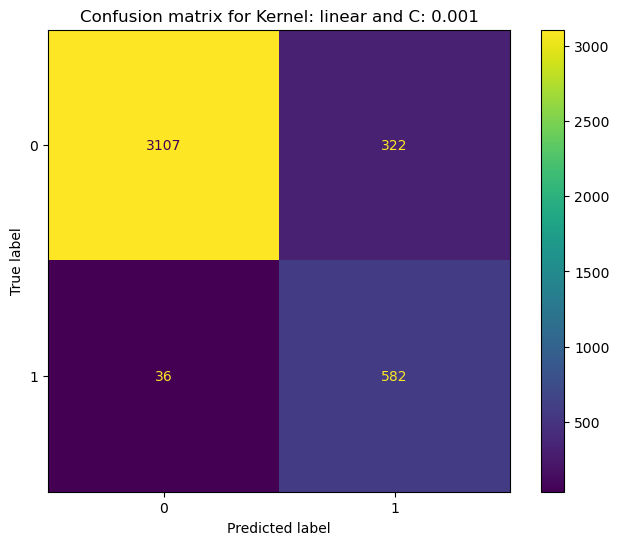

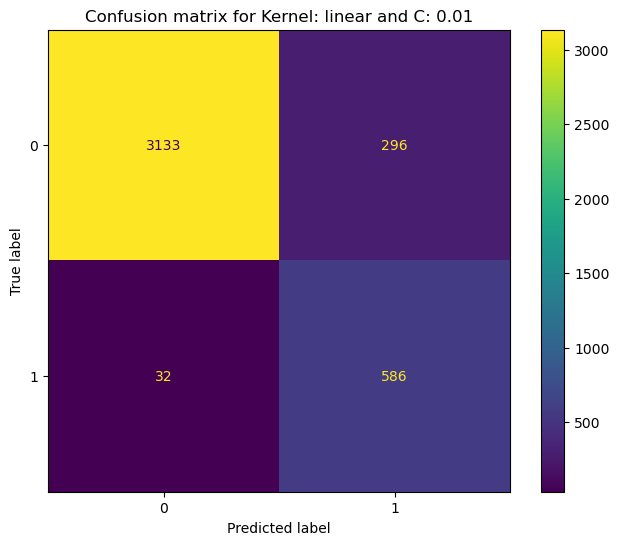

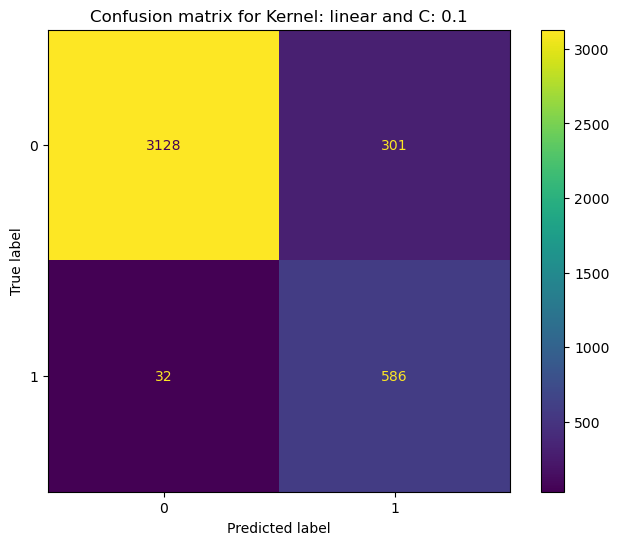

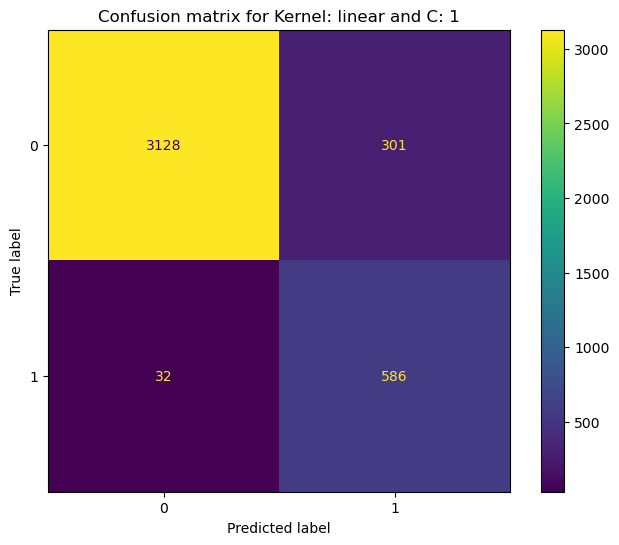

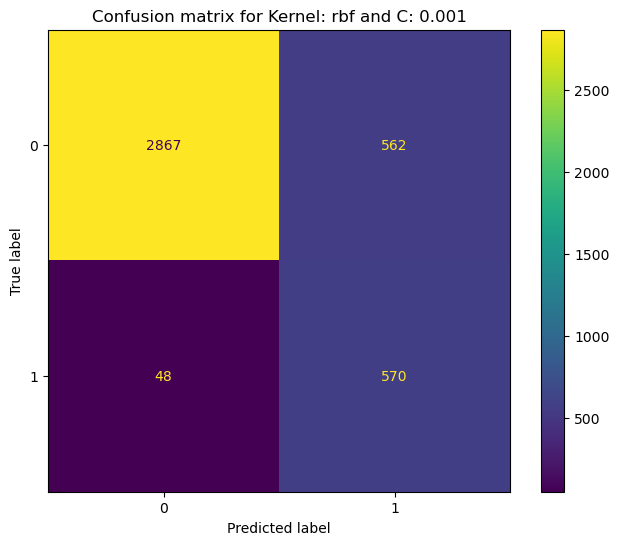

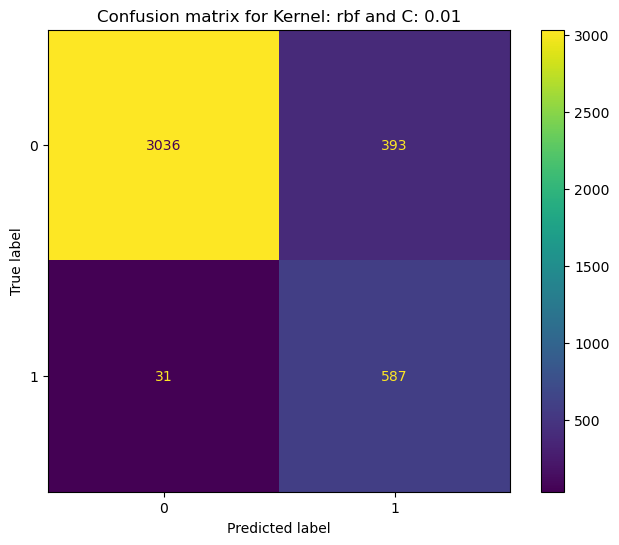

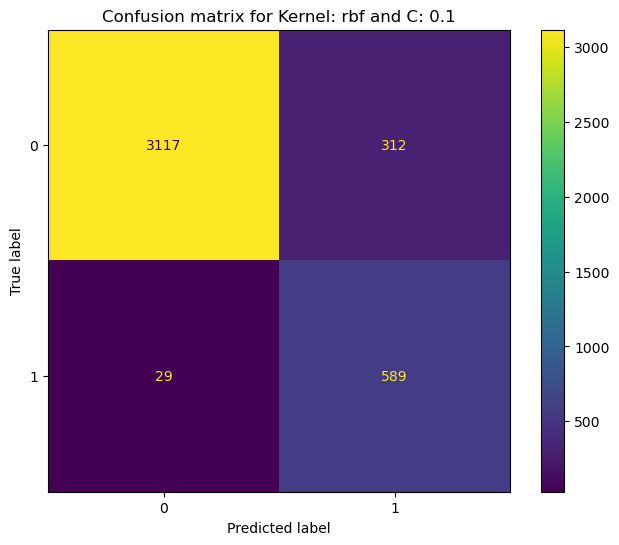

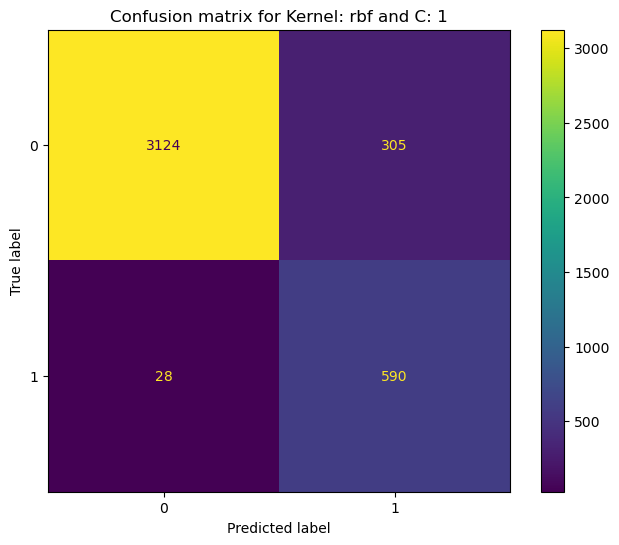

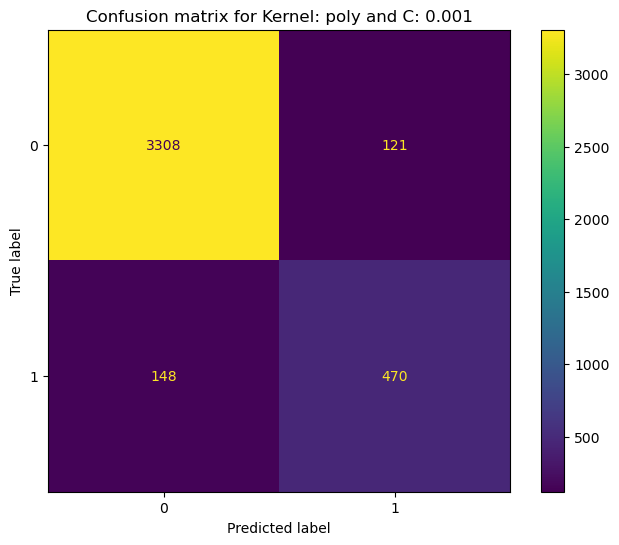

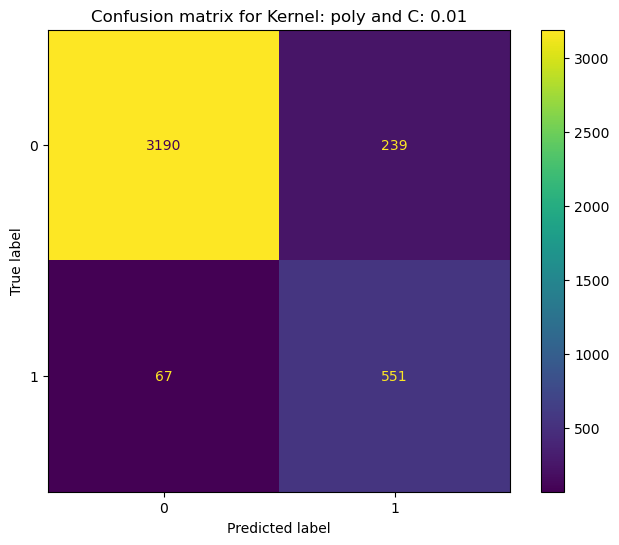

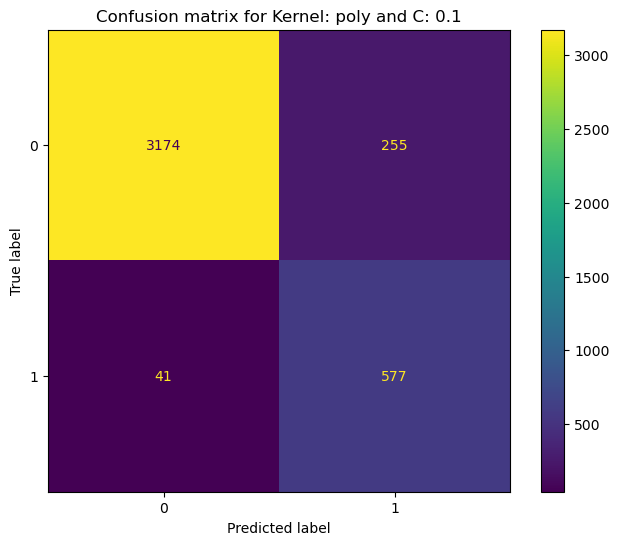

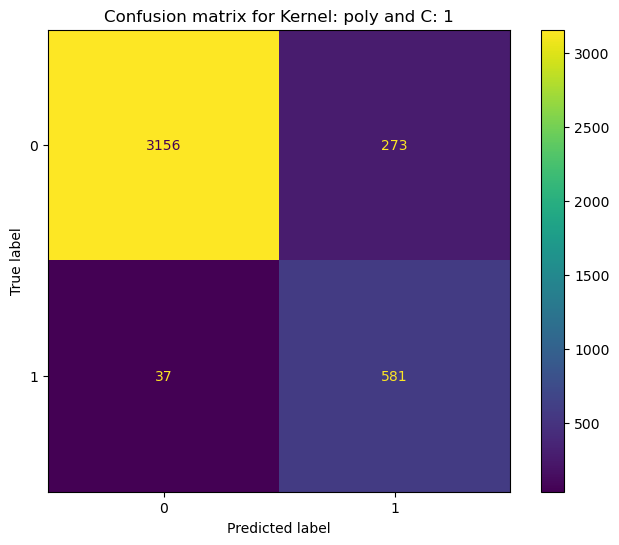

In [50]:
p = {
    "class_weight":"balanced"
}
for kernel in ['linear','rbf','poly']:
    for C in [0.001,0.01,0.1,1]:
        p['kernel'] = kernel
        p['C'] = C
        clf = get_classification_analysis(p)